This script describes genotype calling and eQTL analysis of the pdTF-mediated candidate pcSNPs identified in the previous step.

As a start, you need to download the processed genotype data (plink files) from the GEO database under accession number GSE170763. The download link is https://ftp.ncbi.nlm.nih.gov/geo/series/GSE170nnn/GSE170763/suppl/GSE170763%5Fplink%5Ffiles.tar.gz. Also, install the PLINK software on your device to call SNPs.

# Call candidate pcSNPs mediated by pdTFs

Prepare the SNP list, and run the following code using the command line (we used a windows PC):

plink --bfile E:\regX\T2D\genotype\plink_files\islets --extract ./T2D/snps.txt --recode --out ./T2D/T2D_TFs

After running, we got three files including "T2D_TFs.map" (called SNPs) and "T2D_TFs.ped" (genotypes of the called SNPs) under our assigned directory, while were used in the following analysis.

# cis-eQTL analysis on the called SNPs

In [1]:
library(MatrixEQTL)
library(dplyr)
library(ggplot2)
setwd('/nfs/public/xixi/scRegulate/T2D/predict_status/interpret/GWAS')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df_gwas_hg19 <- read.csv('/nfs/public/xixi/scRegulate/GWAS/GWAS_T2D_hg19_UCSC.csv')
df_gwas_hg19

chrom,chromStart,chromEnd,name,ref,altCount,alts,shiftBases,freqSourceCount,minorAlleleFreq,majorAllele,minorAllele,maxFuncImpact,class,ucscNotes,X_dataOffset,X_dataLen
<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
chr1,183004333,183004334,rs4129858,A,1,"G,",0,12,"0.389377,-inf,0.373415,-inf,-inf,0.389496,-inf,0.38683,0.418526,0.434466,0.403333,0.462617,","A,,A,,,A,,A,A,A,A,G,","G,,G,,,G,,G,G,G,G,A,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,overlapDiffClass,",45719110705,597
chr17,44083947,44083948,rs8067056,T,2,"C,G,",0,12,"0.309105,-inf,0.313989,-inf,-inf,0.298969,-inf,0.328571,0.386352,0.38835,0.288333,0.457547,","T,,T,,,T,,T,T,T,T,C,","C,,C,,,C,,C,C,C,C,T,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,",61196737844,621
chr1,51438364,51438365,rs3176466,C,1,"T,",0,12,"0.155551,-inf,0.157612,-inf,-inf,0.141803,-inf,0.0589549,0.0889984,0.0884574,0.0933333,0.0518868,","C,,C,,,C,,C,C,C,C,C,","T,,T,,,T,,T,T,T,T,T,",1627,snv,"commonSome,commonAll,",44214763215,544
chr1,51457199,51457200,rs72906810,A,2,"C,G,",0,12,"0.0944489,-inf,0.1022,-inf,-inf,-inf,-inf,0.0575893,0.0889984,0.0884574,0.1,-inf,","A,,A,,,,,A,A,A,A,,","G,,G,,,,,G,G,G,G,,",0,snv,"commonSome,commonAll,",54243511620,398
chr1,51506885,51506886,rs12088739,A,1,"G,",0,12,"0.123802,-inf,0.131491,-inf,-inf,0.117386,-inf,0.0566964,0.0871821,0.0938511,0.103333,0.0327103,","A,,A,,,A,,A,A,A,A,A,","G,,G,,,G,,G,G,G,G,G,",0,snv,"commonSome,commonAll,overlapDiffClass,",11954641835,529
chr4,103895316,103895317,rs7659468,T,3,"A,C,G,",0,12,"0.438099,-inf,0.446037,-inf,-inf,0.462661,-inf,-inf,-inf,-inf,0.466667,0.400943,","G,,G,,,G,,,,,T,G,","T,,T,,,T,,,,,G,T,",1627,snv,"refIsMinor,diffMajor,commonSome,commonAll,",57961925722,487
chr6,32781111,32781112,rs2071479,C,1,"T,",0,12,"0.0169728,-inf,0.0211758,-inf,0.019479,0.0252902,-inf,0.0236607,0.0259471,0.0280475,0.05,0.00934579,","C,,C,,C,C,,C,C,C,C,C,","T,,T,,T,T,,T,T,T,T,T,",1627,snv,"commonSome,rareSome,",43696061556,525
chr20,10752609,10752610,rs6134031,C,1,"T,",0,12,"0.180911,-inf,0.197407,-inf,-inf,0.220841,-inf,0.282143,0.281007,0.272654,0.273333,0.0740741,","C,,C,,,C,,C,C,C,C,C,","T,,T,,,T,,T,T,T,T,T,",0,snv,"commonSome,commonAll,",53470866678,548
chr16,3583172,3583173,rs3751837,C,2,"A,T,",0,12,"0.222843,0.220202,0.231102,0.233613,-inf,0.232188,-inf,0.230804,-inf,-inf,0.258333,-inf,","C,C,C,C,,C,,C,,,C,,","T,T,T,T,,T,,T,,,T,,",1627,snv,"commonSome,commonAll,",45339624337,619


In [3]:
snp_tfs <- read.csv('GWAS_SNPs_TFs.csv')
rownames(snp_tfs) <- snp_tfs$snp_name
snps <- read.table('T2D_TFs.map', sep = '\t')$V2
snp_tfs <- snp_tfs[snps,]
snp_tfs

,snp_name,gene
,<chr>,<chr>
rs7787720,rs7787720,ETV1
rs1019029,rs1019029,ETV1
rs7795991,rs7795991,ETV1
rs510807,rs510807,GLIS3
rs7034200,rs7034200,GLIS3
rs10974438,rs10974438,GLIS3
rs6065725,rs6065725,HNF4A
rs1800961,rs1800961,HNF4A


In [4]:
df_gwas_hg19[df_gwas_hg19$name %in% rownames(snp_tfs),]

,chrom,chromStart,chromEnd,name,ref,altCount,alts,shiftBases,freqSourceCount,minorAlleleFreq,majorAllele,minorAllele,maxFuncImpact,class,ucscNotes,X_dataOffset,X_dataLen
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
111,chr7,13886653,13886654,rs7787720,C,1,"T,",0,12,"0.43111,-inf,0.420083,-inf,0.409685,0.437887,-inf,0.473214,0.44603,0.442017,0.498333,-inf,","C,,C,,C,C,,C,C,C,C,,","T,,T,,T,T,,T,T,T,T,,",0,snv,"commonSome,commonAll,",60058146900,636
114,chr7,13894275,13894276,rs1019029,A,1,"G,",0,12,"0.484026,-inf,0.486422,-inf,0.495247,0.488918,-inf,0.485045,0.47042,0.464132,0.483333,0.490654,","G,,A,,G,A,,A,A,A,G,A,","A,,G,,A,G,,G,G,G,A,G,",0,snv,"refIsMinor,diffMajor,commonSome,commonAll,",1893509724,703
116,chr7,13900730,13900731,rs7795991,A,1,"G,",0,12,"0.488219,-inf,0.489392,-inf,0.480927,0.48943,-inf,0.497098,0.490919,0.498112,0.473333,0.32381,","G,,G,,G,G,,A,G,G,G,A,","A,,A,,A,A,,G,A,A,A,G,",0,snv,"refIsMinor,diffMajor,commonSome,commonAll,",60193450340,684
260,chr9,3965688,3965689,rs510807,C,2,"A,T,",0,12,"0.435304,-inf,0.478307,-inf,-inf,-inf,-inf,0.467857,0.464971,0.485437,0.498333,-inf,","C,,C,,,,,A,C,C,C,,","A,,A,,,,,C,A,A,A,,",2152,snv,"refIsMinor,diffMajor,commonSome,commonAll,overlapDiffClass,",46035598609,530
1177,chr9,4289049,4289050,rs7034200,C,2,"A,G,",0,12,"0.444289,-inf,0.463534,-inf,0.430002,0.465322,-inf,0.492857,0.466009,0.485707,0.416667,0.490566,","A,,A,,A,A,,A,C,C,C,A,","C,,C,,C,C,,C,A,A,A,C,",2153,snv,"refIsMinor,diffMajor,commonSome,commonAll,",53974897583,942
1179,chr9,4291927,4291928,rs10974438,A,1,"C,",0,12,"0.307508,-inf,0.288999,-inf,0.243932,0.304951,-inf,0.390848,0.34328,0.357875,0.326667,0.385714,","A,,A,,A,A,,A,A,A,A,A,","C,,C,,C,C,,C,C,C,C,C,",2153,snv,"commonSome,commonAll,",5789288959,634
1723,chr20,43005014,43005015,rs6065725,A,2,"G,T,",0,12,"0.210264,-inf,0.276758,-inf,0.223346,0.27743,-inf,0.273884,0.321484,0.335761,0.338333,-inf,","G,,G,,G,G,,G,G,G,G,,","A,,A,,A,A,,A,A,A,A,,",2153,snv,"refIsMinor,commonSome,commonAll,",53411872177,712
1724,chr20,43042363,43042364,rs1800961,C,1,"T,",0,12,"0.0239617,0.0307654,0.0222589,0.0320046,0.0226695,0.0230853,0.0237583,0.0285714,0.0267255,0.0283172,0.0466667,0.00488599,","C,C,C,C,C,C,C,C,C,C,C,C,","T,T,T,T,T,T,T,T,T,T,T,T,",1583,snv,"clinvar,clinvarBenign,commonSome,rareSome,",41139205128,1180


In [5]:
df_y <- read.csv('/nfs/public/xixi/scRegulate/T2D/data/beta.rna.aggregate_30cells.csv', row.names = 1)
df_y

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WASH7P,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.4887908,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
RP11-34P13.7,0.5153061,0.4947104,0.0000000,0.6109117,0.4992003,0.0000000,0.5585006,0.0000000,0.0000000,0.5495145,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.1669522,0.0000000,0.000000,0.0000000
RP11-34P13.10,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AL627309.1,0.5153061,0.4947104,0.0000000,0.9682721,0.0000000,0.9078881,0.5585006,0.5032808,0.5362918,0.5495145,⋯,0.0000000,0.0000000,0.7953575,0.0000000,0.0000000,0.0000000,0.7362648,0.7882645,0.505620,0.0000000
RP11-34P13.13,0.5153061,0.7840974,0.6291833,0.6109117,0.0000000,0.0000000,0.0000000,0.5032808,0.5362918,0.5495145,⋯,1.3093808,0.0000000,1.8467630,1.1349370,0.0000000,0.6660956,0.0000000,0.0000000,0.505620,0.0000000
RP11-34P13.9,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
AP006222.2,0.5153061,0.4947104,0.0000000,0.0000000,0.4992003,0.0000000,0.5585006,0.5032808,0.5362918,0.8709598,⋯,1.1278392,0.0000000,1.2606118,1.1349370,0.7503937,1.0557365,1.4725297,1.8302935,1.011240,1.7745749
RP11-206L10.17,1.4466472,0.7840974,0.9972320,0.9682721,1.1591072,1.1456272,1.2967983,1.5098425,1.0725836,0.5495145,⋯,1.5831225,1.3509548,1.5907150,0.9775816,1.9397397,1.8699668,2.3339044,1.2493697,0.505620,1.4063173
RP5-857K21.2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000


In [ ]:
donors <- read.csv('/nfs/public/xixi/scRegulate/T2D/data/beta.label.aggregate_30cells.csv', row.names = 1)$donor

In [7]:
genotype <- read.csv('./T2D_TFs.ped', sep = ' ', header = F)
genotype

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,C0014,0,0,1,-9,T,T,C,C,⋯,T,G,A,C,A,A,G,G,C,C
2,C0015,0,0,1,-9,C,C,T,C,⋯,T,T,C,C,A,A,A,A,C,C
3,C0016,0,0,1,-9,T,T,C,C,⋯,T,G,C,C,A,A,A,G,C,C
4,A0018,0,0,1,-9,T,C,T,C,⋯,G,G,A,A,C,C,A,G,C,C
4,C0017,0,0,1,-9,C,C,T,T,⋯,T,T,A,A,C,A,A,G,C,C
5,A0034,0,0,1,-9,C,C,T,T,⋯,T,G,C,C,A,A,G,G,C,C
5,C0019,0,0,1,-9,T,C,T,C,⋯,T,G,C,C,A,A,G,G,C,C
6,A0026,0,0,2,-9,C,C,T,T,⋯,G,G,A,C,A,A,A,G,C,C
6,C0021,0,0,2,-9,T,T,C,C,⋯,G,G,A,A,C,A,G,G,C,C


In [8]:
ref = c('C', 'A', 'A', 'C', 'C', 'A', 'A', 'C')
alt = c('T', 'G', 'G', 'T', 'A', 'C', 'G', 'T')

snps <- data.frame(donor = genotype$V2)
for (i in 1:length(ref)){
    snp = c()
    for (j in 1:nrow(genotype)){
        if (genotype[j, 6+2*i-1]==ref[i] & genotype[j, 6+2*i]==ref[i]){
            snp <- c(snp, 0)
        }else if (genotype[j, 6+2*i-1]==alt[i] & genotype[j, 6+2*i]==alt[i]){
            snp <- c(snp, 2)
        }else{
            snp <- c(snp, 1)
        }
    }
    snps <- cbind(snps, snp)
}
colnames(snps)[2:ncol(snps)] <- rownames(snp_tfs)
rownames(snps) <- snps$donor
snps <- snps[, -1]
snps

,rs7787720,rs1019029,rs7795991,rs510807,rs7034200,rs10974438,rs6065725,rs1800961
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C0014,2,1,2,1,1,0,2,0
C0015,0,1,1,2,0,0,0,0
C0016,2,1,2,1,0,0,1,0
A0018,1,1,1,1,2,2,1,0
C0017,0,1,1,2,2,1,1,0
A0034,0,1,0,1,0,0,2,0
C0019,1,1,1,1,0,0,2,0
A0026,0,1,0,1,1,0,1,0
C0021,2,1,2,1,2,1,2,0


In [9]:
df_gene = as.matrix(df_y[unique(snp_tfs$gene),])
df_gene

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
ETV1,3.311494,2.979328,2.516733,2.8010072,2.995202,3.621286,1.770405,1.741066,3.128131,3.000037,⋯,1.691759,1.979113,2.055969,2.076348,0.7503937,1.7218321,2.7245037,0.7882645,2.185253,1.774575
GLIS3,4.220267,4.494349,5.547499,5.5269938,4.302301,4.895777,4.950654,4.509397,4.455694,4.711343,⋯,4.158929,6.136695,5.872685,3.797017,5.1273579,5.0320784,5.3008657,5.7428240,3.982524,6.640296
HNF4A,0.000000,1.388828,0.000000,0.6109117,1.159107,1.330032,0.000000,0.000000,1.505561,1.275933,⋯,1.309381,2.203312,2.055969,1.263506,0.0000000,0.6660956,0.7362648,2.0376342,1.749158,1.774575


In [10]:
df_snp <- t(snps[donors,])
colnames(df_snp) <- colnames(df_y)
df_snp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
rs7787720,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
rs1019029,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
rs7795991,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
rs510807,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
rs7034200,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
rs10974438,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
rs6065725,2,2,2,2,2,2,2,2,2,2,⋯,0,0,0,0,0,0,0,0,0,0
rs1800961,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
phenotype <- read.csv('./donor_phenotype.csv')
age = phenotype$Age
names(age) <- phenotype$ID
sex = as.integer(phenotype$Sex=='M')
names(sex) <- phenotype$ID
bmi = phenotype$BMI
names(bmi) <- phenotype$ID
df_cov <- rbind(age = age[donors], sex = sex[donors], bmi = bmi[donors])
colnames(df_cov) <- colnames(df_snp)
df_cov

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1385,V1386,V1387,V1388,V1389,V1390,V1391,V1392,V1393,V1394
age,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,⋯,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
sex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bmi,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,⋯,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9,23.9


# cis-eQTL analysis

In [12]:
sd_snp = SlicedData$new()
sd_snp$CreateFromMatrix(df_snp)
sd_snp

SlicedData object. For more information type: ?SlicedData
Number of columns: 1394 
Number of rows: 8 
Data is stored in 1 slices
Top left corner of the first slice (up to 10x10):
           V1 V2 V3 V4 V5 V6 V7 V8 V9 V10
rs7787720   1  1  1  1  1  1  1  1  1   1
rs1019029   1  1  1  1  1  1  1  1  1   1
rs7795991   1  1  1  1  1  1  1  1  1   1
rs510807    1  1  1  1  1  1  1  1  1   1
rs7034200   1  1  1  1  1  1  1  1  1   1
rs10974438  1  1  1  1  1  1  1  1  1   1
rs6065725   2  2  2  2  2  2  2  2  2   2
rs1800961   0  0  0  0  0  0  0  0  0   0

In [15]:
geneanno = read.csv('/nfs/public/xixi/ref_genome/hg19_geneanno.txt', sep='\t')
geneanno = geneanno[, c('Gene.name', 'Chromosome.scaffold.name', 'Gene.start..bp.', 'Gene.end..bp.')]
geneanno = unique(geneanno)
#rownames(geneanno) <- geneanno$Gene.name
geneanno = geneanno[geneanno$Gene.name %in% unique(rownames(df_gene)),]
rownames(geneanno) = rownames(df_gene)
#geneanno = geneanno[, -1]
geneanno[, 2] = paste0('chr', geneanno[, 2])
colnames(geneanno) <- c('genename', 'chr', 'start', 'end')
#geneanno = geneanno[rownames(df_gene),]
geneanno

,genename,chr,start,end
,<chr>,<chr>,<int>,<int>
ETV1,HNF4A,chr20,42984340,43061485
GLIS3,ETV1,chr7,13930853,14031050
HNF4A,GLIS3,chr9,3824127,4348392


In [16]:
df_gwas_hg19 = read.csv('/nfs/public/xixi/scRegulate/GWAS/GWAS_T2D_hg19_UCSC.csv')
df_gwas_hg19 = df_gwas_hg19[, 1:5]
df_gwas_hg19 = df_gwas_hg19[df_gwas_hg19$name %in% rownames(df_snp),]
snppos = data.frame(cbind(snp_name = df_gwas_hg19$name, chr = df_gwas_hg19$chrom, pos = df_gwas_hg19$chromEnd))
rownames(snppos) <- snppos$snp_name
snppos <- snppos[rownames(df_snp),]
snppos$pos <- as.integer(snppos$pos)
snppos

,snp_name,chr,pos
,<chr>,<chr>,<int>
rs7787720,rs7787720,chr7,13886654
rs1019029,rs1019029,chr7,13894276
rs7795991,rs7795991,chr7,13900731
rs510807,rs510807,chr9,3965689
rs7034200,rs7034200,chr9,4289050
rs10974438,rs10974438,chr9,4291928
rs6065725,rs6065725,chr20,43005015
rs1800961,rs1800961,chr20,43042364


In [17]:
sd_snp = SlicedData$new()
sd_snp$CreateFromMatrix(df_snp)
sd_gene = SlicedData$new()
sd_gene$CreateFromMatrix(df_gene)
sd_cov = SlicedData$new()
sd_cov$CreateFromMatrix(df_cov)

useModel = modelLINEAR

# Output file name
output_file_name_cis = tempfile();
output_file_name_tra = tempfile();

# Only associations significant at this level will be saved
pvOutputThreshold_cis = 5e-2;
pvOutputThreshold_tra = 5e-2;

# Error covariance matrix
# Set to numeric() for identity.
errorCovariance = numeric();

cisDist = 5e5

In [18]:
me = Matrix_eQTL_main(snps = sd_snp,
                        gene = sd_gene,
                        cvrt = sd_cov,
                        output_file_name= output_file_name_tra,
                        pvOutputThreshold= pvOutputThreshold_tra,
                        useModel = useModel,
                        errorCovariance = errorCovariance,
                        verbose = TRUE,
                        output_file_name.cis = output_file_name_cis,
                        pvOutputThreshold.cis = pvOutputThreshold_cis,
                        snpspos = snppos,
                        genepos = geneanno,
                        cisDist = cisDist,
                        pvalue.hist = "qqplot",
                        min.pv.by.genesnp = FALSE,
                        noFDRsaveMemory = FALSE);

unlink(output_file_name_tra)
unlink(output_file_name_cis)

Matching data files and location files

3 of 3 genes matched

8 of 8 SNPs matched


Task finished in 0.005 seconds

Processing covariates

Task finished in 0.004 seconds

Processing gene expression data (imputation, residualization)

Task finished in 0.004 seconds

Creating output file(s)

Task finished in 0.019 seconds

Performing eQTL analysis

100.00% done, 6 cis-eQTLs, 10 trans-eQTLs

Task finished in 0.023 seconds





Analysis done in:  0.039  seconds 

Detected local eQTLs: 
        snps  gene  statistic       pvalue          FDR       beta
1   rs510807 GLIS3  19.850691 2.142305e-77 1.713844e-76  2.5259569
2  rs7795991  ETV1 -13.845628 6.192781e-41 2.477112e-40 -0.7533935
3  rs7034200 GLIS3 -13.574804 1.658382e-39 4.422352e-39 -1.1642880
4 rs10974438 GLIS3 -13.237851 9.252838e-38 1.850568e-37 -1.1657665
5  rs7787720  ETV1  -8.803975 3.848665e-18 6.157864e-18 -0.5414580
6  rs6065725 HNF4A  -7.270172 5.972545e-13 7.963393e-13 -0.2834955

Detected distant eQTLs: 
         snps  gene  statistic       pvalue          FDR       beta
1  rs10974438  ETV1 -20.516191 6.448768e-82 1.031803e-80 -0.9432290
2    rs510807  ETV1  16.989939 5.772308e-59 4.617846e-58  1.2516293
3   rs7787720 GLIS3 -15.111100 7.029598e-48 3.749119e-47 -1.5758670
4   rs7795991 GLIS3 -12.805758 1.434354e-35 5.737418e-35 -1.2518490
5   rs7034200  ETV1 -11.237922 4.158450e-28 1.330704e-27 -0.5515321
6    rs510807 HNF4A   7.099347 1.99376

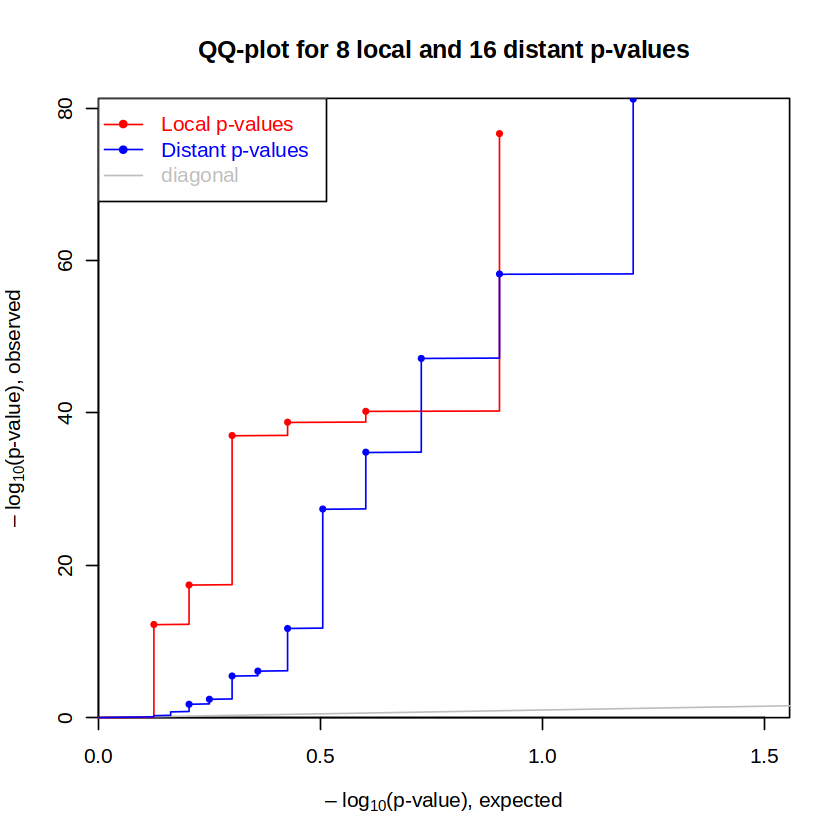

In [19]:
cat('Analysis done in: ', me$time.in.sec, ' seconds', '\n');
cat('\nDetected local eQTLs:', '\n');
show(me$cis$eqtls)
cat('\nDetected distant eQTLs:', '\n');
show(me$trans$eqtls)

## Plot the Q-Q plot of local and distant p-values

plot(me)

In [20]:
me$cis$eqtls

snps,gene,statistic,pvalue,FDR,beta
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs510807,GLIS3,19.850691,2.142305e-77,1.713844e-76,2.5259569
rs7795991,ETV1,-13.845628,6.192781e-41,2.477112e-40,-0.7533935
rs7034200,GLIS3,-13.574804,1.658382e-39,4.422352e-39,-1.1642880
rs10974438,GLIS3,-13.237851,9.252838e-38,1.850568e-37,-1.1657665
rs7787720,ETV1,-8.803975,3.848665e-18,6.157864e-18,-0.5414580
rs6065725,HNF4A,-7.270172,5.972545e-13,7.963393e-13,-0.2834955


In [ ]:
donor_status_mapping <- as.factor(phenotype$Status)
names(donor_status_mapping) <- phenotype$ID
status <- donor_status_mapping[donors]

In [22]:
data = c()
for (i in 1:nrow(me$cis$eqtls)) {
    df_data = data.frame(cbind(snp = df_snp[me$cis$eqtls$snps,][i,], gene = df_gene[me$cis$eqtls$gene,][i,], 
                               group = rep(me$cis$eqtls$snps[i], ncol(df_snp)), status = as.character(status)))
    df_data$snp = as.character(df_data$snp)
    data = rbind(data, df_data)
}
data$snp = as.factor(data$snp)
data$gene = as.numeric(data$gene)
#data$group = as.factor(data$group)
data

,snp,gene,group,status
,<fct>,<dbl>,<chr>,<chr>
V1,1,4.220267,rs510807,Pre-T2D
V2,1,4.494349,rs510807,Pre-T2D
V3,1,5.547499,rs510807,Pre-T2D
V4,1,5.526994,rs510807,Pre-T2D
V5,1,4.302301,rs510807,Pre-T2D
V6,1,4.895777,rs510807,Pre-T2D
V7,1,4.950654,rs510807,Pre-T2D
V8,1,4.509397,rs510807,Pre-T2D
V9,1,4.455694,rs510807,Pre-T2D


png 
  2

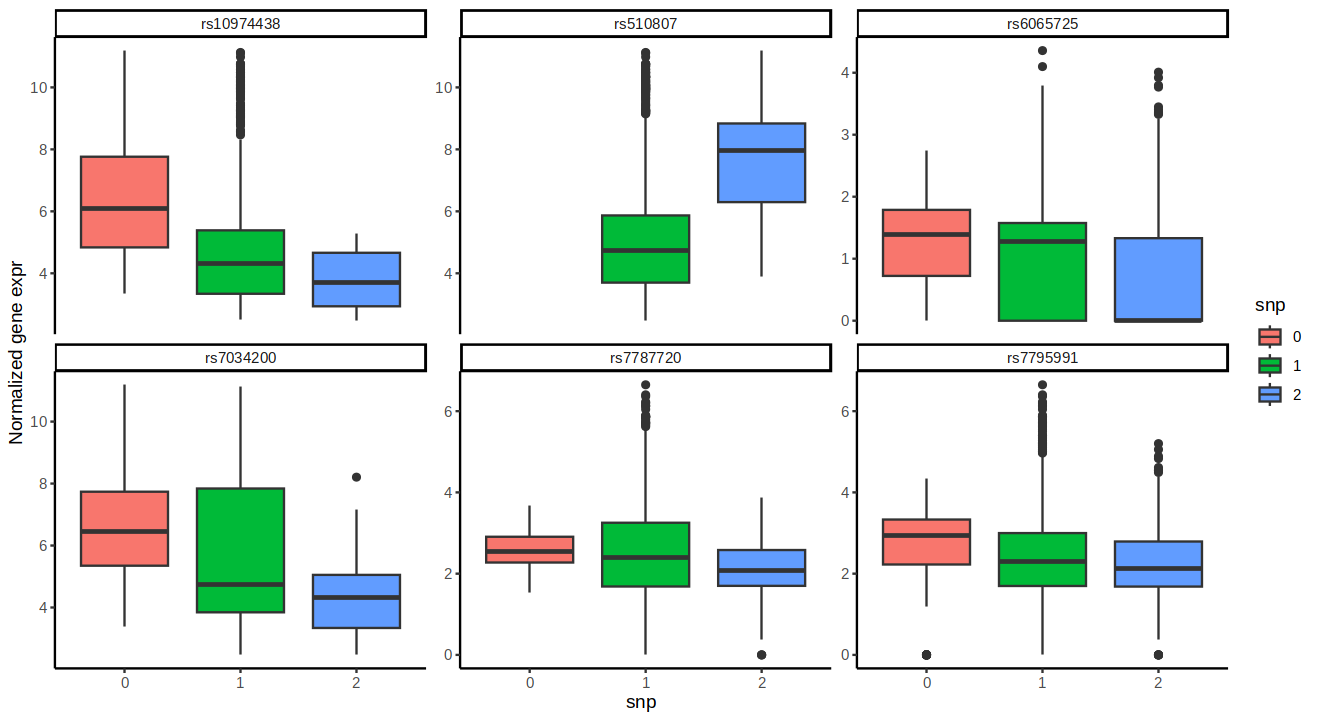

In [38]:
options(repr.plot.width=11, repr.plot.height=6)

p <- ggplot(data, aes(x=snp, y=gene, fill=snp)) +
  geom_boxplot()+theme_classic()+labs(y = "Normalized gene expr")+facet_wrap(~group, scales = "free_y", ncol = 3)

pdf('/nfs/public/xixi/scRegulate/figures/supp_fig6.1.pdf', width = 11, height = 6)
print(p)
dev.off()
p